# Домашняя работа "Оценка точности модели, переобучение, регуляризация" обновленное


### Преподаватель: 
Даниил Корбут, Наталья Баданина

## Задание

### Цель: 
закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.
### Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.
### Этапы работы:
#### Преобразуйте данные:
- проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
- закодируйте категориальные переменные числовыми значениями по необходимости.
- Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
- Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
- Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
- Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
- Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
- Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
- *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

#### Сформулируйте выводы по проделанной работе:
- Как по полученным графикам сделать вывод о качестве модели? 
- Как вы оцениваете обученную модель исходя из подсчитанных метрик?
- *может ли ROC-кривая проходить ниже диагонали?

#### Результат:
- проведена оценка качества модели классификации;
- реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

### Форма выполнения:
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

### Инструменты:
Jupyter Notebook/Google Colab
GitHub
файл athletes.csv
Срок выполнения: дедлайн приема решений на проверку

*Рекомендации к выполнению:
Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.

Убедитесь, что по ссылкам есть доступ на чтение/просмотр.

Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [1]:
import pandas as pd
import numpy as np

In [23]:
# Решить задачу классификации при помощи обучения модели логистической регрессии. 
# Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. 
# Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.
# 
# В УСЛОВИИ ЗАДАЧИ НЕ УКАЗАНО, КАКАЯ ИМЕННО ИЗ КОЛОНОК ДАТАСЕТА ЯВЛЯЕТСЯ ЦЕЛЕВОЙ.
# Поскольку единственная колонка в датасете, являющаяся по сути бинарной - это колонка sex, будем считать, 
# предсказывать надо будет именно пол спортсмена
# При этом более логичным кажется предсказание количества медалей...
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [13]:
##########################
# проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости
##########################
print(data.info())
def count_nans(df, col_name):
    return len(df[pd.isnull(df[col_name])])

for col in data.columns:
    empty_vals = count_nans(data, col)
    if empty_vals > 0:
        print(f'Колонка {col} содержит {empty_vals} пустых строк')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB
None
Колонка dob содержит 1 пустых строк
Колонка height содержит 330 пустых строк
Колонка weight содержит 659 пустых строк


In [21]:
# Видим, что у нас совокупное количество пропусков явно меньше 10 процентов от общего количества записей.
# Можно было бы заняться умной заменой значений, но на текущем шаге попробую удалить все записи с пустыми значениями.
# Потом можно будет проверить и сценарий с заменой.
data_f = data.dropna(axis='rows')
data_f.info()

print(f'\nИз {data.id.count()} осталось {data_f.id.count()}\nЭто составляет {round(data_f.id.count()*100/data.id.count(), 2)} процентов')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB

Из 11538 осталось 10858
Это составляет 94.11 процентов


In [36]:
# Изучим столбцы датасета, содержащие категориальные данные.
# Поле name потенциально одно из самых однозначных полей в этом датасете, поскольку очевидно, что есть мужские и женские имена.
# Но поскольку в нашей текущей задаче главное - не угадать, а научиться строить кривые ROC-AUC, это поле мы просто отбросим.


In [48]:
# поле nationality интуитивно хочется отбросить, но есть при этом ощущение, что представители некоторых наций в среднем 
# могут быть меньше, чем представители других наций. Тем не менее понятно. что тут может быть много выбросов, 
# связанных и со смешанными браками, и со сменой гражданства, и просто с физиологическими особенностями каждого спортсмена.
# Интереса ради посмотрим тем не менее, как отличается средний рост спортсменов по странам
mean_heights_by_nationality = data_f[['height', 'nationality']].groupby(data_f.nationality  ).mean()

print('Статистический анализ роста по всем спортсменам:\n', data_f.height.describe())
print('\nСтатистический анализ среднего роста по странам:\n', mean_heights_by_nationality.describe())

# Видно, что действительно принадлежность к определенной нации сильно влияет на значение среднего роста.

Статистический анализ роста по всем спортсменам:
 count    10858.000000
mean         1.766942
std          0.113111
min          1.210000
25%          1.690000
50%          1.760000
75%          1.840000
max          2.210000
Name: height, dtype: float64

Статистический анализ среднего роста по странам:
            height
count  200.000000
mean     1.740211
std      0.058424
min      1.530000
25%      1.705000
50%      1.748000
75%      1.776114
max      1.900000


In [49]:
# Поде dob (видимо - date of birthday) можно отлично преобразовать в число. 
# К примеру, возраст спортсмена в годах, в месяцах, в днях или даже в формате unix time stamp :) 
# Но при этом интуитивно кажется, что возраст спортсмена не может давать никаких намеков на его пол.
# Для данной задачи я бы от этого поля избавился.

In [50]:
# С видами спорта ситуация следующая. Видно, что почти для каждого вида спорта количество спортсменов в выборке неплохое.
# Для задачи предсказания пола спортсмена это поле кажется неплохим. Кажется очевидным, что для многих видов спорта
# рост и вес спортсменов являются специфическими. В этой связи это поле кажется полезным.
# К примеру, вот что получается со средним ростом спортсменов по каждому из видов спорта: 
print('Количество видов спорта:', len(data_f.sport.unique()))
# data_f.sport.groupby(data_f.sport).count()
mean_heights_by_sport = data_f[['height', 'sport']].groupby(data_f.sport).mean()
mean_heights_by_sport

Количество видов спорта: 27


,height
sport,
aquatics,1.788338
archery,1.735952
athletics,1.752039
badminton,1.745610
basketball,1.919120
canoe,1.781101
cycling,1.747151
equestrian,1.749349
fencing,1.772449


In [ ]:
# Поля Gold, Silver и Bronze я отброшу. Казалось бы, при чем тут пол? 

In [66]:
##########################
# закодируйте категориальные переменные числовыми значениями по необходимости.
##########################
# В итоговой выборке я хочу оставить поля nationality, height, weight, sport, предварительно преобразовав
# категориальные поля nationality и sport
# Может быть, это - ошибочное решение, но я попытаюсь отранжировать справочники для nationality и sport по среднему росту
# Есть еще один путь - использовать OneHotEncoder для этих полей, расширив размерность пространства признаков.
# Но, опять-таки, для текущего задания главная задача - не столько точность предсказания, сколько анализ оценки точности модели

# Создаем справочники категорий для видов спорта и для наций
# (получившиеся ниже цепочки преобразований проверял последовательно. В каждой из них вначале иде сортировка
# по возрастанию по среднему значению роста для вида спорта или нации соответственно. А далее все это преобразуется в словари)
sports_cat = mean_heights_by_sport.sort_values(by='height').reset_index()['sport'].reset_index().set_index('sport').to_dict()
print(sports_cat)
#sports_cat['index']['hockey']

nationality_cat = mean_heights_by_nationality.sort_values(by='height').reset_index()['nationality'].reset_index().set_index('nationality').to_dict()
print(nationality_cat)

{'index': {'gymnastics': 0, 'weightlifting': 1, 'table tennis': 2, 'wrestling': 3, 'shooting': 4, 'triathlon': 5, 'hockey': 6, 'judo': 7, 'archery': 8, 'badminton': 9, 'golf': 10, 'football': 11, 'cycling': 12, 'equestrian': 13, 'athletics': 14, 'rugby sevens': 15, 'sailing': 16, 'modern pentathlon': 17, 'fencing': 18, 'canoe': 19, 'aquatics': 20, 'taekwondo': 21, 'tennis': 22, 'handball': 23, 'rowing': 24, 'volleyball': 25, 'basketball': 26}}
{'index': {'FSM': 0, 'BRU': 1, 'TOG': 2, 'PRK': 3, 'PLW': 4, 'RWA': 5, 'NRU': 6, 'NEP': 7, 'COD': 8, 'KIR': 9, 'SAM': 10, 'CAM': 11, 'GUY': 12, 'BHU': 13, 'MAW': 14, 'PHI': 15, 'BAN': 16, 'SOL': 17, 'IVB': 18, 'VIE': 19, 'MHL': 20, 'GEQ': 21, 'CAF': 22, 'LIB': 23, 'OMA': 24, 'ZIM': 25, 'TAN': 26, 'PAN': 27, 'PLE': 28, 'MAD': 29, 'STP': 30, 'INA': 31, 'ECU': 32, 'COM': 33, 'SIN': 34, 'SRI': 35, 'PER': 36, 'GUA': 37, 'MAS': 38, 'MGL': 39, 'YEM': 40, 'KSA': 41, 'THA': 42, 'MKD': 43, 'MYA': 44, 'IND': 45, 'JPN': 46, 'TPE': 47, 'NAM': 48, 'ESA': 49, '

In [73]:
# Соберем датасет.
# Вначале добавляем колонки со значениями из справочников видов спорта и наций:
data_f['sport_id'] = [sports_cat['index'][x] for x in data_f['sport']]
data_f['nationality_id'] = [nationality_cat['index'][x] for x in data_f['nationality']]
# data_f.head()

# А теперь формируем X и y для нашего датасета, оставляя только нужные столбцы
X = data_f[['nationality_id', 'sport_id', 'weight', 'height']]
print(X.head())

   nationality_id  sport_id  weight  height
0             135        14    64.0    1.72
1              78        18    56.0    1.68
2             115        14    79.0    1.98
3             151        21    80.0    1.83
4             150        12    71.0    1.81


In [74]:
# Для целевой колонки воспользуемся мощью библиотеки sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data_f['sex'] ) )
print(y.head())
#y = data_f[]

0    1
1    0
2    1
3    1
4    1
dtype: int32


In [96]:
##########################
# Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
##########################
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Сразу же создадим модель и обучим ее на тренировочной выборке
model = LogisticRegression()
model.fit(X_train, y_train)

# Предскажем и целевое значение, и вероятности 
predictions = model.predict(X_test)
predictions_probabilities = model.predict_proba(X_test)

# Из спортивного интереса сравним первые 25 значений
print(predictions[0:25])
print(y_test[0:25].to_list())

[1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1]
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [109]:
##########################
# Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
##########################
from sklearn.metrics import roc_curve

fpr, tpr, thres = roc_curve( y_test, predictions_probabilities[:, 1])
print(len(fpr))
# Вычислена 591 точка

591


Text(0.5, 1.0, 'ROC-кривая')

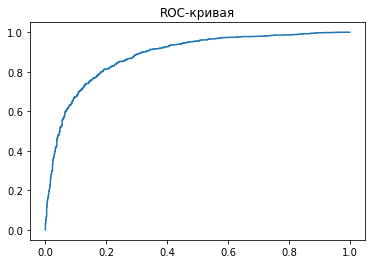

In [126]:
from matplotlib import pyplot as plt

plt.plot( fpr, tpr )
plt.title('ROC-кривая')

In [101]:
##########################
# Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
##########################
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions_probabilities[:, 1])

0.8840757678410118

In [121]:
##########################
# Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
##########################
# Создадим функцию для формирования массивов точек со значениями TPR, FPR и Threshold для заданного количества шагов
# UPD: Для того, чтобы можно было выполнить последующие шаги в ДЗ, дополняю код функций ниже,
# чтобы они позволили возвращать также значение Precision

# Эта функция позволяет для конкретного значения порога посчитать величины tpr (recall), fpr, precision
def count_roc_point(yy_test, yy_predictions, tresh):
    tp, fn, fp, tn = 0, 0, 0, 0
    for ind, yy in enumerate(yy_test):
        if yy_predictions[ind] > tresh:
            if yy == 1:
                tp += 1
            else:
                fp += 1
        else:
            if yy == 1:
                fn += 1
            else:
                tn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    precision = tp / (tp + fp)
    return tpr, fpr, precision
    
# Эта функция в цикле изменяет порог границы от 0 до 1 с заданным количеством шагов (points)    
# И возвращает четыре списка со значениями порогов и соответствующими ему значениями  fpr, tpr, precision
def custom_roc_curve(yy_test, yy_predictions, points):
    tresh_list, tpr_list, fpr_list, precision_list = [], [], [], []
    for tresh in np.arange(0, 1, 1/points):
        tpr_, fpr_, precision_ = count_roc_point(yy_test, yy_predictions, tresh)
        tresh_list.append(tresh)
        tpr_list.append(tpr_)
        fpr_list.append(fpr_)
        precision_list.append(precision_)
    return fpr_list, tpr_list, precision_list, tresh_list    

fpr_custom, tpr_custom, precision_custom, tresh_custom = custom_roc_curve(y_test, predictions_probabilities[:, 1], 150)        
print(tpr_custom)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9991582491582491, 0.9983164983164983, 0.9983164983164983, 0.9974747474747475, 0.9957912457912458, 0.9924242424242424, 0.9907407407407407, 0.9882154882154882, 0.9873737373737373, 0.9865319865319865, 0.9856902356902357, 0.9856902356902357, 0.984006734006734, 0.9823232323232324, 0.9806397306397306, 0.9797979797979798, 0.9789562289562289, 0.9781144781144782, 0.9781144781144782, 0.9781144781144782, 0.9764309764309764, 0.9755892255892256, 0.9739057239057239, 0.9739057239057239, 0.9730639730639731, 0.9705387205387206, 0.968013468013468, 0.9663299663299664, 0.9638047138047138, 0.9612794612794613, 0.9612794612794613, 0.9570707070707071, 0.9545454545454546, 0.9511784511784511, 0.9494949494949495, 0.9478114478114478, 0.9461279461279462, 0.9427609427609428, 0.9393939393939394, 0.9385521885521886, 0.936026936026936, 0.9343434343434344, 0.9276094276094277, 0.9242424242424242, 0.92003367003367, 0.9175084175084175, 0.9158249158249159, 0.9132996632996633, 0.9107744107744108,

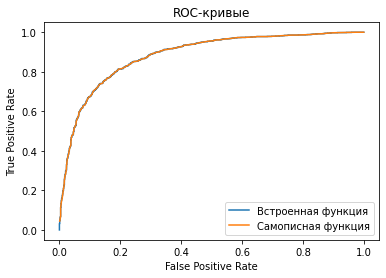

In [132]:
##########################
# Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
##########################
plt.plot( fpr, tpr, label='Встроенная функция' )
plt.plot( fpr_custom, tpr_custom, label='Самописная функция' )
plt.title('ROC-кривые')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
#Похоже, кривые довольно неплохо совпадают. Прямо даже удивительно :)

Text(0.5, 1.0, 'Кривая Precision-Recall')

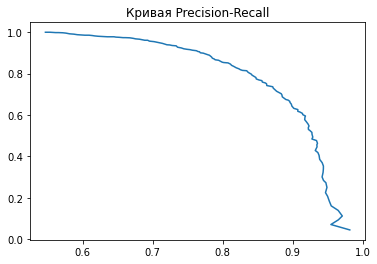

In [129]:
##########################
# Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
##########################
# Ну откровенно говоря напрямую метрики, полученные ранее, для этого не использовать.
# Но никто не мешает доработать одну из ранее определенных функций для того, чтобы можно было ее использовать
# Для вычисления новых метрик. Recall у нас фактически совпадает с TPR, тут алгоритм сохраняется. А вот Precision надо посчитать
# На этом этапе я вернулся на два шага назад и дополнил ранее созданные функции дополнительным функционалом,
# который позволил вычислить recall (совпадает с tpr) и precision

plt.plot( precision_custom, tpr_custom )
plt.title('Кривая Precision-Recall')

# Откровенно говоря, немного неожиданым выглядит загогулина в правом нижнем углу, но в целом характер кривой кажется ожидаемым.

In [140]:
##########################
# *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
##########################
# Фактически нам надо посчитать площадь под кривой ROC. 
# Можно быстро написать цикл, который будет работать следующим образом
# Мы последовательно переберем все интервалы между точками массива False Positive Rate
# и пытаемся посчитать площадь трапеции, образованной точками [fpr(i),0], [fpr(i),tpr(i)], [fpr(i+1),tpr(i+1)]
# Далее площади этих мини-трапеций складываем.
# Поскольку 

def custom_roc_auc_score(tpr_, fpr_):
    square_ = 0
    last_fpr, last_tpr = 0, 0
    for ind, fpr_i in enumerate(fpr_):
        square_ += (fpr_i - last_fpr) * (tpr_[ind] + last_tpr) / 2
        last_fpr = fpr_i
        last_tpr = tpr_[ind]
    return square_

# При вызове функции точки в массивах переворачиваем, иначе ничего не получится
print(custom_roc_auc_score(tpr_custom[::-1], fpr_custom[::-1]))    

# Цифра получилась неплохая - она почти совпала с вычисленной с помощью встроенной функции (0.8840...)

0.8839290602501987
